# Oppenheimer’s Poster


IMPORTING ALL THE DESIRED LIBRARIES


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Images using cv2.imread() and resizing explosion image to the oppen heimer's image


In [14]:
oppenheimer_image = cv2.imread("../Images/oppenheimer.png")
explosion_image = cv2.imread("../Images/atomicbomb.jpg")

In [15]:
def blend_images(image1, image2):
    # define the value of hsv for the color green
    height, width, _ = image1.shape
    resized_image2 = cv2.resize(image2, (width, height))
    lower_green = (0, 100, 0)
    upper_green = (100, 255, 100)
    green_screen_mask = cv2.inRange(image1, lower_green, upper_green)
    inverse_green_screen_mask = cv2.bitwise_not(green_screen_mask)
    masked_image1 = cv2.bitwise_and(
        image1, image1, mask=inverse_green_screen_mask)

    masked_image2 = cv2.bitwise_and(
        resized_image2, resized_image2, mask=green_screen_mask)

    final_image = cv2.add(masked_image1, masked_image2)
    return final_image

In [16]:
def bitwise_not_manual(image):
    result = np.zeros_like(image)

# Iterate through each pixel and perform bitwise_not
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = 255 - image[i, j]
    return result

In [17]:
def blend_images_manual(image1,image2):
    height, width, _ = image1.shape
    resized_image2 = cv2.resize(image2, (width, height))
    lower_green = (0, 100, 0)
    upper_green = (100, 255, 100)
    green_screen_mask = cv2.inRange(image1, lower_green, upper_green)
    inverse_green_screen_mask = bitwise_not_manual(green_screen_mask)
    masked_image1 = cv2.bitwise_and(
        image1, image1, mask=inverse_green_screen_mask)

    masked_image2 = cv2.bitwise_and(
        resized_image2, resized_image2, mask=green_screen_mask)

    final_image = cv2.add(masked_image1, masked_image2)
    return final_image
    

(-0.5, 789.5, 594.5, -0.5)

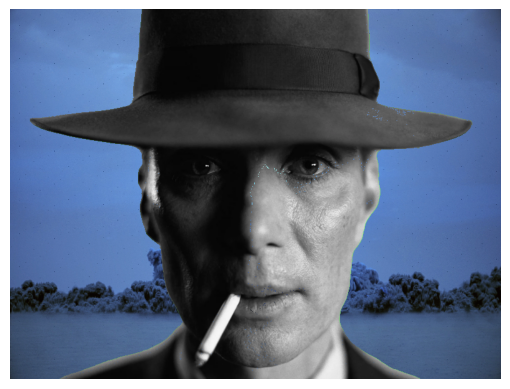

In [18]:
finalImage = blend_images(oppenheimer_image, explosion_image)
cv2.imwrite("../Images/oppenheimer's Poster A.jpg", finalImage)
plt.imshow(finalImage)
plt.axis("off")

(-0.5, 789.5, 594.5, -0.5)

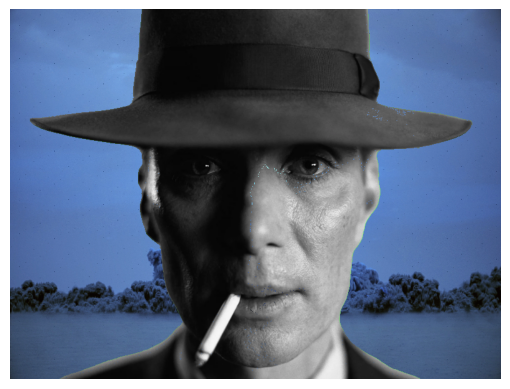

In [19]:
finalImage = blend_images_manual(oppenheimer_image, explosion_image)
cv2.imwrite("../Images/oppenheimer's Poster AM.jpg", finalImage)
plt.imshow(finalImage)
plt.axis("off")

OPPENHEIMER Q1 B : MAKE SOME MORE ATTRACTIVE POSTERS


(-0.5, 479.5, 269.5, -0.5)

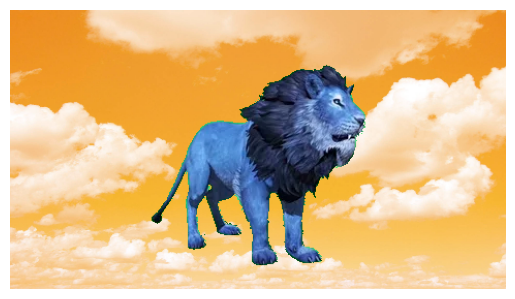

In [20]:
# wanna see lion in the sky

lion_image = cv2.imread("../Images/LION-GREE.webp")
sky_image = cv2.imread("../Images/sky.jpg")

new_image = blend_images(lion_image, sky_image)
cv2.imwrite("../Images/Lion_in_the_sky.jpg", new_image)
plt.imshow(new_image)
plt.axis("off")

OPPENHEIMER Q1 C: HOW MANY IMAGES OF SIZE 720\*480 CAN BE STORED IF CLOUD OF SIZE 2 GB IS AVAILABLE. SHOW YOUR CALCULATIONS IN MARKDOWN


To determine how many images of size 720 x 480 can be stored in a 2 GB cloud, we need to consider the size of each image and the available space.

1. We can calculate the size of a single image in bytes:
   - Image Width: 720 pixels
   - Image Height: 480 pixels
   - Bytes per Pixel: 3 , assuming we are talking about RGB images.

Size of image = 720 x 480 x 3 bytes = 1,036,800 bytes

2. Convert 2 GB to bytes:

   - 2 GB =   2,147,483,648 bytes

3. Calculate the number of images that can be stored:
   - Number of images = Available space / Size of image
   - Number of images =  2,147,483,648 bytes / 1,036,800 bytes ≈ 2071 images

Therefore, approximately 2071 images of size 720 x 480 can be stored in a 2 GB cloud.


# ************************************************************\_************************************************************


# QUANTISED EXPLOSION


In [21]:
def bitQuantizeImage(image, k):
    # flatten the image
    image_values = image.flatten()
    im_normalized = image_values / 255.0
    # WHEN THERE WERE 8 BIT THAT TIME WE DID 2**8-1=255
    quantized_im = (im_normalized * (2**k - 1)).astype(np.uint8)
    quantized_im = quantized_im.reshape(image.shape)
    image = image.reshape(image.shape)
    # show the original image vs the bit quantized image
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(122)
    plt.imshow(quantized_im, cmap='gray')
    plt.title(f'{k}-Bit Quantized Image')

    plt.show()

    return quantized_im

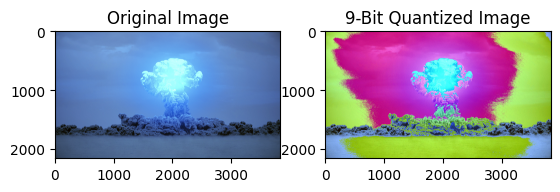

In [22]:
imagetoquantize = cv2.imread('../Images/atomicbomb.jpg')
k = 9
quantized_image = bitQuantizeImage(imagetoquantize, k)

QUANTIZED EXPLOSION PART III

Explaination:
We will convert the image into binary representation in k bits say if some pixel has value 3 we write as 011 if say the bits are 3. Now we can create a new image for each bit plane, like least significant bit, most significant bit so on..

Create Images from Bit Planes:
For each bit plane, we create a new image where all the pixel values are either 0 or 1, based on the value of the corresponding bit in the binary representation.


In [23]:
image = cv2.imread("../Images/atomicbomb.jpg", cv2.IMREAD_GRAYSCALE)
bit_planes = []
for i in range(8):
    bit_plane = (image >> i) & 1
    bit_planes.append(bit_plane)  # Scaling to 0-255 range
bit_planes

[array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 1, ..., 0, 1, 1],
        [0, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 0, 1]], dtype=uint8),
 array([[1, 1, 0, ..., 0, 1, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [0, 1, 1, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 1, 0, 1],
        [1, 0, 0, ..., 0, 1, 1],
        [1, 0, 1, ..., 0, 1, 0]], dtype=uint8),
 array([[0, 1, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0]], dtype=uint8),
 array([[1, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0

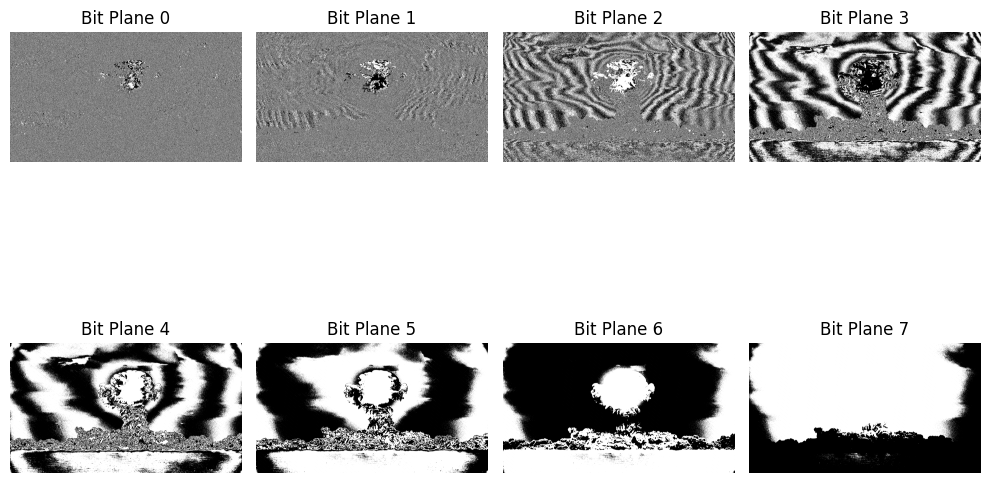

In [24]:
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Through bit plane slicing, it was observed that the higher-order bit planes, containing the most significant bits, often carry the main features and important details in an image. On the other hand, the lower-order bit planes, which represent the least significant bits, tend to introduce more noise into the image. This suggests that when we focus on the higher-order bit planes, we can better understand the crucial aspects of the image, while the lower-order bit planes mainly affect the image's noise level.

# ________________________________________________________________________________________________________________________


# COLOR CORRECTED BARBIE


In [25]:
def linContrastStretching(im, a, b):
    min_val = np.min(im)  # MINIMUM INTENSITY VALUE OF IMAGE RIGHT NOW
    max_val = np.max(im)  # MAXIMUM INTENSITY VALUE OF IMAGE RIGHT NOW
    stretched_im = ((im - min_val) * ((b - a) / (max_val - min_val))) + a
    stretched_im = np.clip(stretched_im, a, b).astype(np.uint8)
    return stretched_im

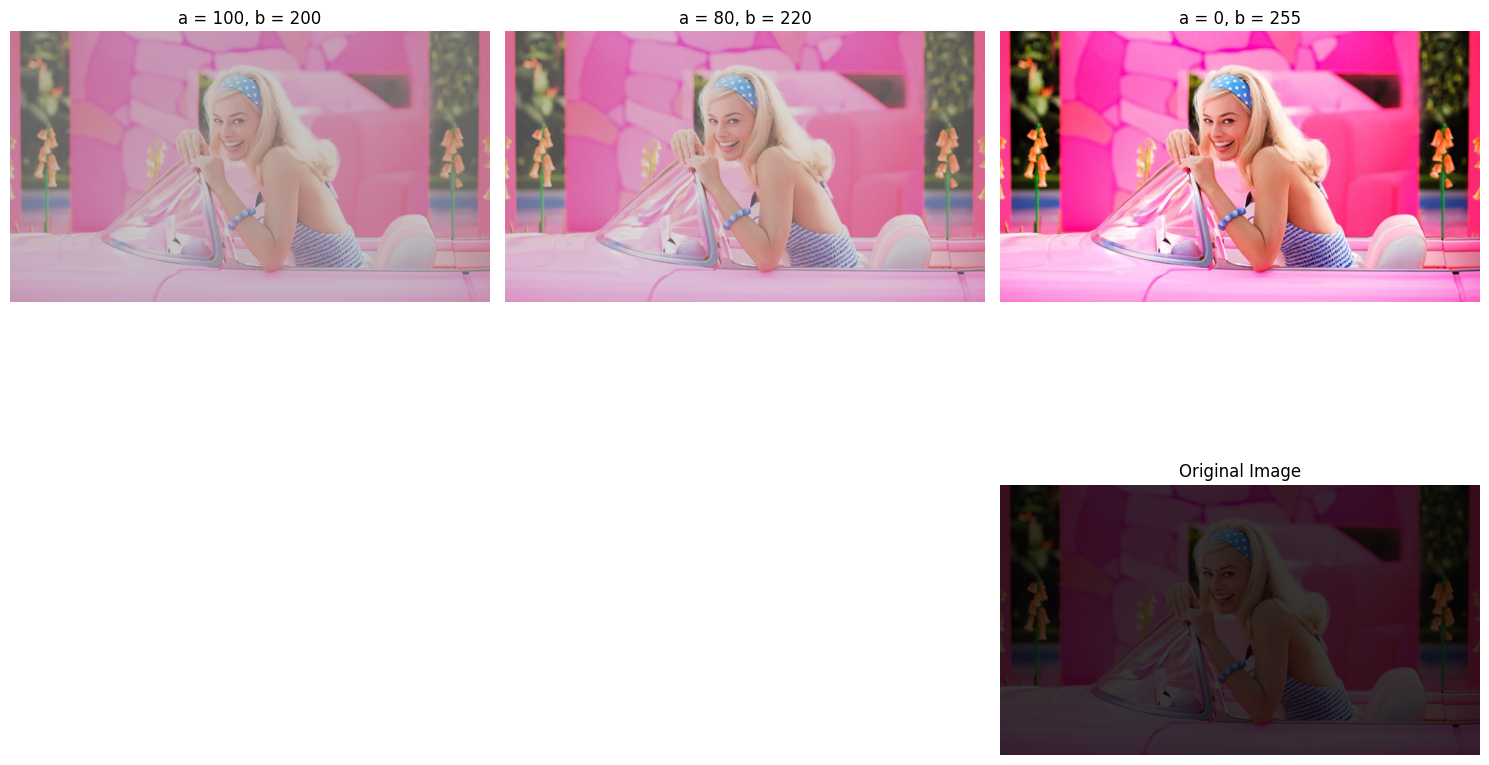

In [26]:
# Load the image
im = cv2.imread('../Images/barbie_flat.png', cv2.IMREAD_COLOR)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

a_values = [100, 80, 0]
b_values = [200, 220, 255]

# Plotting
plt.figure(figsize=(15, 10))

for i, (a, b) in enumerate(zip(a_values, b_values), 1):
    stretched_im = linContrastStretching(im_rgb, a, b)
    plt.subplot(2, 3, i)
    plt.imshow(stretched_im)
    plt.title(f'a = {a}, b = {b}')
    plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(im_rgb)
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Part C: TO plot K frequent colors before and after contrast streching


In [27]:
from collections import Counter
image=im_rgb

In [28]:
def plotcolorbar(image):
    k = 10  # Number of most frequent colors
    flattened_image = image.reshape(-1, 3)
    
    color_counter = {}  # Manually count colors

    # Count the occurrences of each unique color tuple
    for color_tuple in flattened_image:
        color_tuple = tuple(color_tuple)
        if color_tuple in color_counter:
            color_counter[color_tuple] += 1
        else:
            color_counter[color_tuple] = 1

    # Get the top k most common colors
    most_common_colors = sorted(color_counter, key=lambda x: color_counter[x], reverse=True)[:k]
    colorbar = np.array(most_common_colors, dtype=np.uint8)
    plt.figure(figsize=(10, 2))
    plt.imshow([colorbar])
    plt.axis('off')
    plt.title('Most Frequent Colors')
    plt.show()


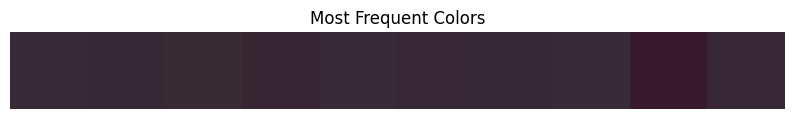

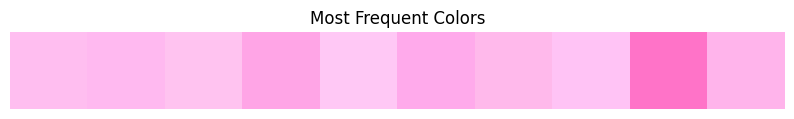

In [29]:
plotcolorbar(image)
plotcolorbar(linContrastStretching(image, 0, 255))

Contrast stretching is a fundamental technique in image processing used to enhance the visibility of details within an image. It involves adjusting the pixel intensities to a specified range while maintaining their relative order. Two key observations were made:

- Improved Visibility: When contrast is stretched to cover a broader range, previously subtle details become more distinguishable. However, if we limit the stretching range, for example, to [50, 150], we effectively reduce the range of intensities, leading to a loss of detail and decreased visibility.


- Enhanced Contrast: Contrast stretching works by linearly transforming pixel values. The key idea is to utilize the range of pixel values available. For instance, when we stretch the contrast to [0, 255], we utilize the entire pixel value range, resulting in a visually clearer and more detailed image.

 The choice of stretching range should be made based on the specific characteristics of the image, with the understanding that wider ranges generally lead to improved visibility, while narrower ranges may reduce visibility.




# ________________________________________________________________________________________________________________________


# HISTOGRAM EQUALISATION


In [30]:
import numpy as np
# Load the image
img = cv2.imread('../Images/low.png', cv2.IMREAD_GRAYSCALE)

In [31]:
import numpy as np

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_min = np.min(cdf)  # Minimum value of CDF
    cdf_normalized = 255*(cdf - cdf_min) / (cdf.max() - cdf_min)
    equalized_image = cdf_normalized[img]
    equalized_image = equalized_image.reshape(img.shape)  # Reshape to the original shape
    return equalized_image


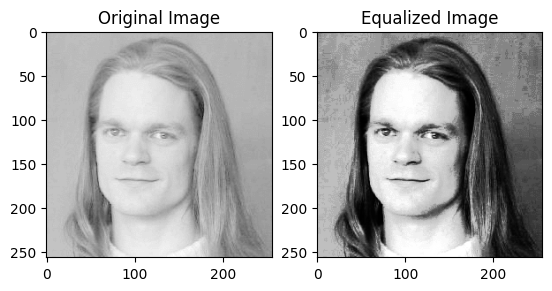

In [32]:
equalized_imge = histogram_equalization(img)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(equalized_imge, cmap='gray')
plt.title('Equalized Image')

plt.show()

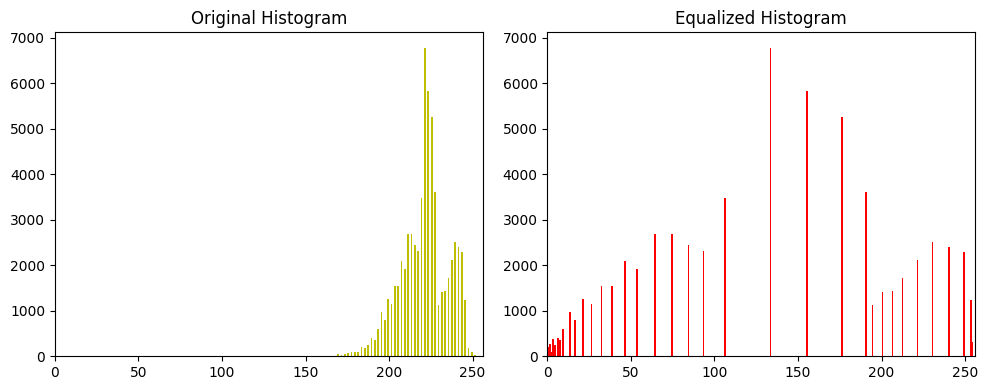

In [33]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(img.flatten(), 256, [0, 256], color='y')
plt.xlim([0, 256])
plt.title('Original Histogram')

# Plot the equalized histogram
plt.subplot(1, 2, 2)
plt.hist(equalized_imge.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.title('Equalized Histogram')

# Show the histograms
plt.tight_layout()
plt.show()

# ________________________________________________________________________________________________________________________


# EXPLOSION EFFECT


here we need to perform piece wise linear transformation that means we are giving thr range of intensity values and we are given correspnding slope and the intercept


Text(0.5, 1.0, 'Original Stairs Image')

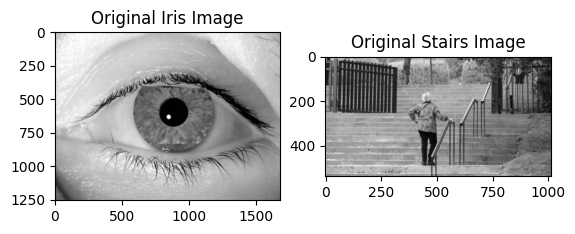

In [34]:
image_iris = cv2.imread("../Images/iris1.png", cv2.IMREAD_GRAYSCALE)/255
image_stairs = cv2.imread("../Images/stairs2.png", cv2.IMREAD_GRAYSCALE)/255

plt.subplot(1, 2, 1)
plt.imshow(image_iris, cmap="gray")
plt.title("Original Iris Image")

plt.subplot(1, 2, 2)
plt.imshow(image_stairs, cmap="gray")
plt.title("Original Stairs Image")

In [35]:
# define vector A and B for the image
A_iris = [(0.0, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 1)]
B_iris = [(0.0, 0.0), (-1, 0.7), (0.0, 0.0), (1.0, -0.1)]

A_stairs = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
B_stairs = [(0.0, 0.0), (0.0, 0.2), (0.0, 0.4), (0.0, 0.6), (0.0, 0.8)]

In [36]:
def piecewise_linear_transform(image, A, B):
    image_values = image.flatten()
    output_image = np.copy(image_values)

    for i in range(len(A)):
        x1, y1 = A[i]
        slope, intercept = B[i]
        lower_bound = x1 
        upper_bound = y1 
        mask = np.logical_and(image_values >= lower_bound, image_values <= upper_bound)
        transformed_intensities = slope* image_values + intercept
        transformed_intensities = np.clip(transformed_intensities, 0, 1)
        output_image = np.where(mask, transformed_intensities, output_image)

    return output_image.reshape(image.shape)

In [37]:
transformed_image_iris = piecewise_linear_transform(image_iris, A_iris, B_iris)
transformed_image_stairs = piecewise_linear_transform(image_stairs, A_stairs, B_stairs)

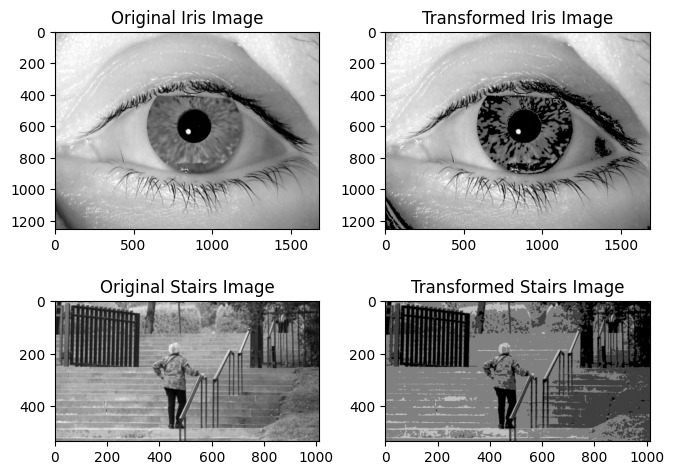

In [38]:
# Plot the images
plt.figure(figsize=(10, 5))

# Original Iris Image
plt.subplot(2, 3, 1)
plt.imshow(image_iris, cmap='gray')
plt.title('Original Iris Image')

# Transformed Iris Image
plt.subplot(2, 3, 2)
plt.imshow(transformed_image_iris, cmap='gray')
plt.title('Transformed Iris Image')

# Original Stairs Image
plt.subplot(2, 3, 4)
plt.imshow(image_stairs, cmap='gray')
plt.title('Original Stairs Image')

# Transformed Stairs Image
plt.subplot(2, 3, 5)
plt.imshow(transformed_image_stairs, cmap='gray')
plt.title('Transformed Stairs Image')

plt.tight_layout()
plt.show()

In [39]:
def plotintensity(image_original,image_transform):
    flattened_intensity_original_iris = image_original.flatten()
    flattened_intensity_transformed_iris = image_transform.flatten()
    plt.figure(figsize=(8, 6))
    plt.scatter(flattened_intensity_original_iris, flattened_intensity_transformed_iris)
    plt.xlabel('Original Intensity ')
    plt.ylabel('Transformed Intensity')
    plt.title('Intensity Transformation Plot')
    plt.show()


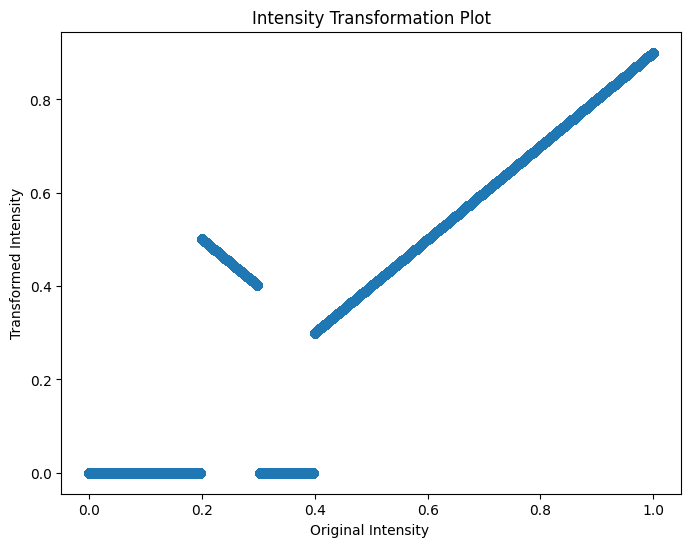

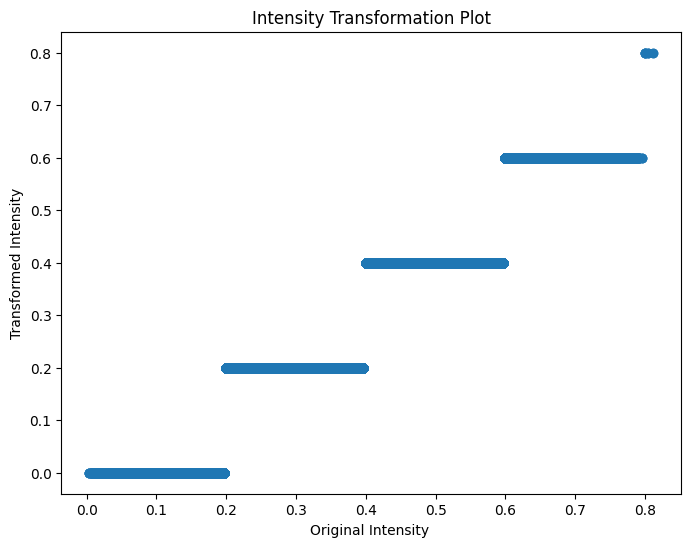

In [40]:
plotintensity(image_iris,transformed_image_iris)
plotintensity(image_stairs,transformed_image_stairs)

# _______________________________________________________________________________________________________________________


# Oppies Filter


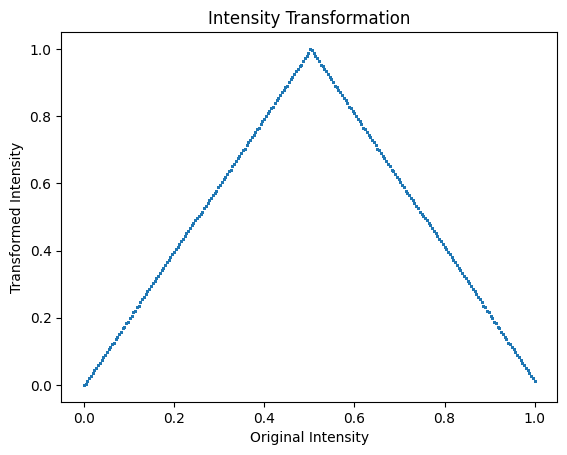

In [41]:
original_image = cv2.imread('../Images/micro.jpg', cv2.IMREAD_GRAYSCALE)/255
transformed_image = cv2.imread('../Images/transformed.png', cv2.IMREAD_GRAYSCALE)/255

original_pixels=original_image.flatten()
transformed_pixels=transformed_image.flatten()
# Plot the scatter plot
plt.scatter(original_pixels, transformed_pixels, s=1)
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation')
plt.show()

In [42]:
def calc_slope_intercept(point1, point2):
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    intercept = point1[1] - slope * point1[0]
    return slope, intercept

In [43]:
point1_1 = (0, 0)
point2_1 = (0.5, 0.98)
slope, intercept = calc_slope_intercept(point1_1, point2_1)
input_range_1 = np.arange(0, 0.5)  # Intensity range for this transformation
output_range_1 = slope * input_range_1 + intercept

# Line 2
point1_2 = (0.5, 0.98)
point2_2 = (1, 0)
slope2, intercept2 = calc_slope_intercept(point1_2, point2_2)
input_range_2 = np.arange(0.51, 1)  # Intensity range for this transformation
output_range_2 = slope2 * input_range_2 + intercept2



In [44]:
# lets make array A and B
A_intensity = [(0.0, 0.5), (0.5,1)]
B_slope_intercept = [(slope, intercept), (slope2, intercept2)]
transformed_image_formula= piecewise_linear_transform(original_image, A_intensity, B_slope_intercept)

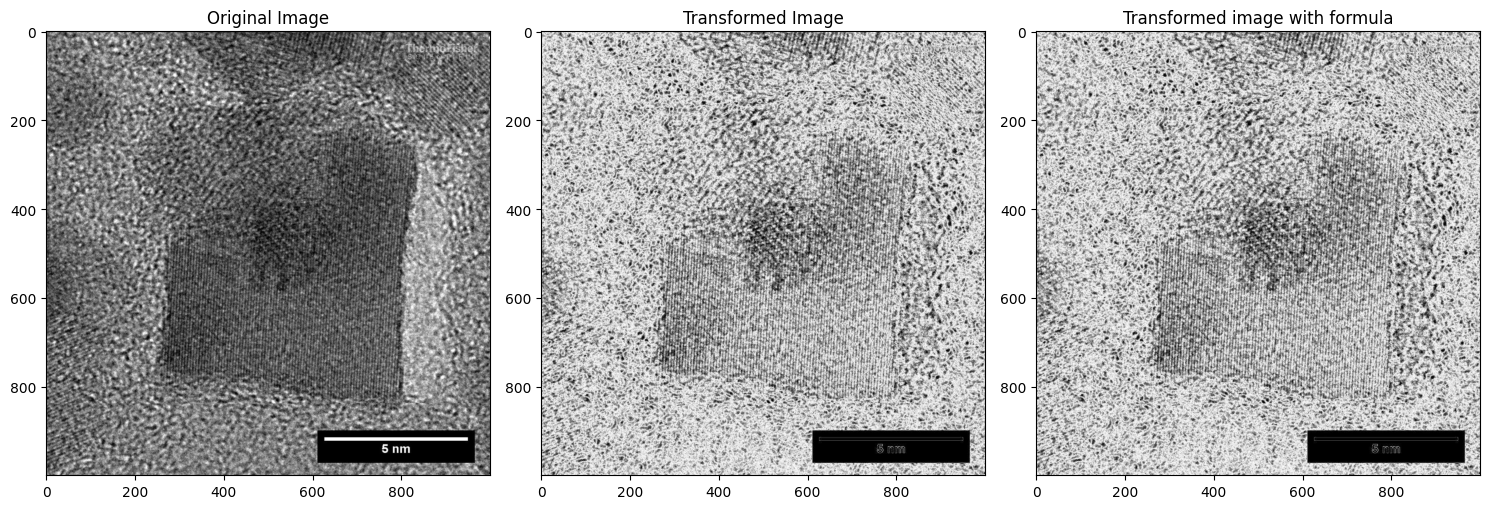

In [45]:
# Plot the images
plt.figure(figsize=(15, 5)) 

# Original Iris Image
plt.subplot(1, 3, 1)  
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

# Transformed Iris Image
plt.subplot(1, 3, 2)  
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

# Original Stairs Image
plt.subplot(1, 3, 3)  
plt.imshow(transformed_image_formula, cmap='gray')
plt.title('Transformed image with formula')

plt.tight_layout()
plt.show()


PLOT THE GRAPH OF TRANSFORMATION FUNCTION

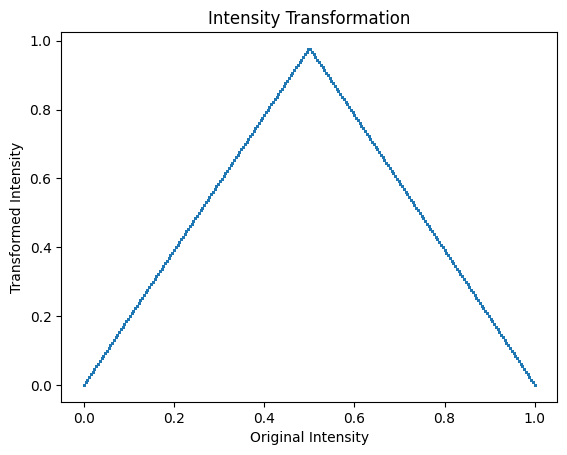

In [46]:
# # Plot the graph
transformed_image_formula_pixels= transformed_image_formula.flatten()
plt.scatter(original_pixels, transformed_image_formula_pixels, s=1)
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation')
plt.show()

APPLY TO THREE MORE IMAGES AND SHOW THE RESULTS


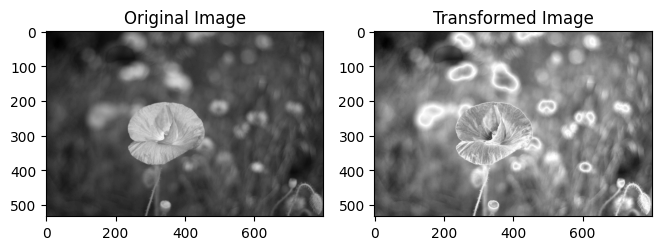

In [47]:
Image1 = cv2.imread('../Images/Poppy.jpg', cv2.IMREAD_GRAYSCALE)/255
transformed_Image1=piecewise_linear_transform(Image1, A_intensity, B_slope_intercept)

# Plot the images
plt.figure(figsize=(10, 6)) 

# Original Iris Image
plt.subplot(1, 3, 1)  
plt.imshow(Image1, cmap='gray')
plt.title('Original Image')

# Transformed Iris Image
plt.subplot(1, 3, 2)  
plt.imshow(transformed_Image1 , cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()

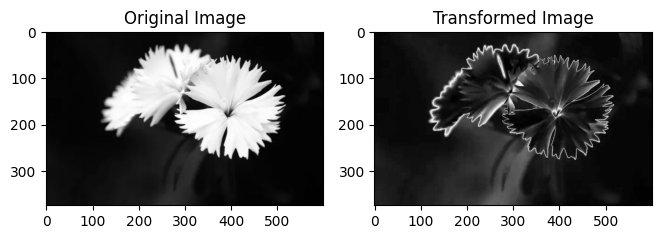

In [48]:
Image2 = cv2.imread('../Images/tonal-contrast-1.webp', cv2.IMREAD_GRAYSCALE)/255
transformed_Image2=piecewise_linear_transform(Image2, A_intensity, B_slope_intercept)

# Plot the images
plt.figure(figsize=(10, 6)) 

# Original Iris Image
plt.subplot(1, 3, 1)  
plt.imshow(Image2, cmap='gray')
plt.title('Original Image')

# Transformed Iris Image
plt.subplot(1, 3, 2)  
plt.imshow(transformed_Image2 , cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()

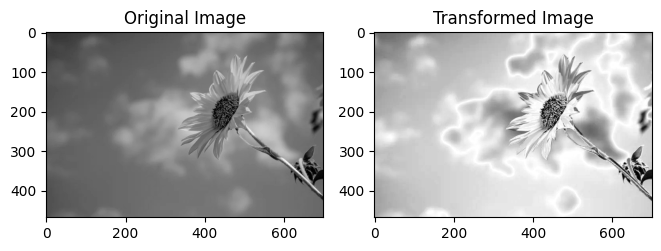

In [49]:
Image3 = cv2.imread('../Images/contrast-photography-high-contrast.webp', cv2.IMREAD_GRAYSCALE)/255
transformed_Image3=piecewise_linear_transform(Image3, A_intensity, B_slope_intercept)

# Plot the images
plt.figure(figsize=(10, 6)) 

# Original Iris Image
plt.subplot(1, 3, 1)  
plt.imshow(Image3, cmap='gray')
plt.title('Original Image')

# Transformed Iris Image
plt.subplot(1, 3, 2)  
plt.imshow(transformed_Image3 , cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()